In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datas = pd.read_csv('lianjia_zufang.csv')
datas = datas[['链接', '价格', '面积']]

datas.index = [url[7: 9] for url in datas['链接']]

In [3]:
datas.shape

(50453, 3)

In [4]:
datas.head(5)

,链接,价格,面积
bj,http://bj.lianjia.com/zufang/101101322952.html,3400.0,57.16平米
bj,http://bj.lianjia.com/zufang/101101321532.html,7100.0,104平米 (套内85平米)
bj,http://bj.lianjia.com/zufang/101101469142.html,4500.0,39平米 (套内29平米)
bj,http://bj.lianjia.com/zufang/101101380783.html,6800.0,100平米 (套内82平米)
bj,http://bj.lianjia.com/zufang/101101431664.html,4200.0,53平米 (套内41平米)


In [5]:
datas.groupby([datas.index]).describe()

价格
bj count    3056.000000
   mean     7030.881545
   std      4672.566530
   min      1000.000000
   25%      4300.000000
   50%      5800.000000
   75%      8000.000000
   max     50000.000000
cd count    3000.000000
   mean     2587.295333
   std      1328.557994
   min       400.000000
   25%      1800.000000
   50%      2300.000000
   75%      3000.000000
   max     18200.000000
cq count    2733.000000
   mean     3347.038053
   std      4460.218931
   min       400.000000
   25%      1800.000000
   50%      2500.000000
   75%      3500.000000
   max    168000.000000
cs count    3000.000000
   mean     2760.576667
   std      2454.548208
   min       700.000000
   25%      1800.000000
   50%      2400.000000
...                 ...
xm std      4255.989843
   min       200.000000
   25%      2300.000000
   50%      3200.000000
   75%      4800.000000
   max     70000.000000
yt count    3000.000000
   mean     1910.557667
   std      1316.940390
   min       300.000000
   25%      1300.000000
   50%      1600.000000
   75%      2100.000000
   max     25000.000000
zh count     307.000000
   mean     3464.791531
   std      1740.636238
   min       700.000000
   25%      2350.000000
   50%      3000.000000
   75%      4000.000000
   max     15000.000000
zs count     837.000000
   mean     2424.327360
   std      1011.940355
   min       650.000000
   25%      1800.000000
   50%      2300.000000
   75%      2800.000000
   max      8000.000000

[160 rows x 1 columns]

In [6]:
meanPrices = datas.groupby([datas.index]).mean()

In [7]:
meanPrices

,价格
bj,7030.881545
cd,2587.295333
cq,3347.038053
cs,2760.576667
dg,3279.602079
dl,2505.698333
fs,2991.564532
gz,4452.052000
hf,2172.155000
hz,5761.003631


In [8]:
fig = plt.figure()
plt.plot(meanPrices['价格'].values)
plt.xlim(0, 20)
plt.grid()
num = 0
for meanPrice in meanPrices.index:
    plt.annotate(meanPrice,
                 xy=(num, meanPrices['价格'].values[num]), xytext=(-20, 20), textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', facecolor='black', connectionstyle='arc3,rad=0'))
    num += 1

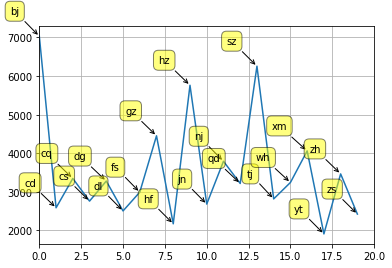

In [9]:
plt.show()

In [102]:
import re

In [103]:
def areas(num):
    return re.search('(.*?)平米', num).group(1)

datas['areas'] = datas['面积'].apply(areas).astype(float)

In [104]:
datas.groupby([datas.index])['areas'].describe()

bj  count    3056.000000
    mean       85.945690
    std        37.133248
    min        21.000000
    25%        59.000000
    50%        80.000000
    75%       100.000000
    max       441.000000
cd  count    3000.000000
    mean       84.755290
    std        32.329542
    min         7.000000
    25%        62.000000
    50%        83.475000
    75%        95.832500
    max       307.000000
cq  count    2733.000000
    mean       97.575847
    std        73.030508
    min        10.750000
    25%        63.000000
    50%        86.000000
    75%       120.000000
    max      2800.000000
cs  count    3000.000000
    mean       96.765597
    std        50.455090
    min        17.800000
    25%        59.847500
    50%        90.000000
                ...     
xm  std        58.199802
    min         8.000000
    25%        47.725000
    50%        88.000000
    75%       124.000000
    max      1200.000000
yt  count    3000.000000
    mean       83.229997
    std        36.010084


In [105]:
meanAreas = datas.groupby([datas.index])['areas'].mean()

In [106]:
meanAreas

bj     85.945690
cd     84.755290
cq     97.575847
cs     96.765597
dg    102.468922
dl     71.846873
fs    100.312025
gz     81.809000
hf     92.950737
hz    104.663317
jn     89.387580
nj     87.244817
qd     93.403853
sz     82.307237
tj     75.519670
wh     93.082283
xm     90.637873
yt     83.229997
zh     94.517362
zs    100.007384
Name: areas, dtype: float64

In [107]:
fig = plt.figure()

In [108]:
plt.plot(meanAreas.values)

In [109]:
plt.xlim(0, 20)
plt.grid()
num = 0

In [110]:
for index in meanPrices.index:
    plt.annotate(index,
                 xy=(num, meanAreas[num]), xytext=(-20, 20), textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', facecolor='black', connectionstyle='arc3,rad=0'))
    num += 1

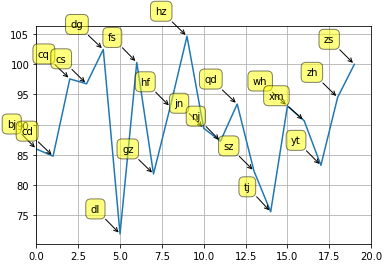

In [111]:
plt.show()